# Importazione librerie

In [5]:
from nltk import word_tokenize, pos_tag, SnowballStemmer, stem 
from nltk.corpus import stopwords

import os
from os import path

import string
import emoji
import time
from wordcloud import WordCloud

import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter

snow_stemmer = SnowballStemmer(language='english')
start_time = time.time()

print("Tempo di esecuzione: %s secondi. " % (time.time() - start_time))

Tempo di esecuzione: 5.0067901611328125e-05 secondi. 


# Strutture dati

In [6]:
start_time = round(time.time(),2)
# Struttura dati

# Percorsi
df = 'row_data/dataframes/'
rs = 'row_data/resources/'

# Dictionary relativo alle 
stemmed_words = {
    'anger': [],
    'anticipation': [],
    'disgust': [],
    'fear': [],
    'joy': [],
    'sadness': [],
    'surprise': [],
    'trust': []  
}

resources = {}                                 # Dictionary contenente le risorse estrapolate dai file
stemmed_keys = list(stemmed_words.keys())      # Lista contenente le chiavi di emotions 
hashtags = {}                                  # Dictionary con il conteggio di tutti gli hashtag trovati                    # Dictionary con il conteggio di tutte le emoji negative trovate trovate
emojis = {}                                    # Dictionary con il conteggio di tutte le emoticon/emoji positive trovate  
emoticons = {}                                 # Dictionary con il conteggio di tutte le emoticon/emoji positive trovate 
punctuation_marks = {}                         # Dictionary con il conteggio di tutte le punteggiature trovate
slang = {}                                     # Dictionary con il conteggio di tutte gli slang trovati
words_count = {}                               # Dictionary con il conteggio di tutte le risorse trovate nei tweet

pos_emot = ['B-)',':)', ':-)', ":')", ":'-)", ':D', ':-D', ":\'-)",":')",':o)',':]',':3',':c)',':>','=]','8)','=)',':}',':^)','8-D','8D','x-D','xD','X-D','XD','=-D','=D','=-3','=3','B^D',':-))',':*',':^*','( \'}{\' )','^^','(^_^)','^-^',"^.^","^3\^","\^L\^"]
neg_emot = [":(",":-(",":'(",":'-(",">:[",":-c",":c",":-<",":<",":-[",":[",":{",":\-(",":\'("," _(",":\'[","='(","'[","='[",":'-<",":'<",":'<","='<", "='<", "T_T", "T.T","(T_T)", "y_y","y.y","(Y_Y)",";-;", ";_;",";.;",":_:","o .__. o",".-."]

#pos_emojis = [u'\U0001F601',u'\U0001F602',u'\U0001F603',u'\U0001F604',u'\U0001F605',u'\U0001F606',u'\U0001F609',u'\U0001F60A',u'\U0001F60B',u'\U0001F60E',u'\U0001F60D',u'\U0001F618',u'\U0001F617',u'\U0001F619',u'\U0001F61A',u'\U0000263A',u'\U0001F642',u'\U0001F917',u'\U0001F607',u'\U0001F60F',u'\U0001F61C',u'\U0001F608',u'\U0001F646',u'\U0001F48F',u'\U0001F44C',u'\U0001F44F',u'\U0001F48B',u'\U0001F638',u'\U0001F639',u'\U0001F63A',u'\U0001F63B',u'\U0001F63C',u'\U0001F63D',u'\U0001F192',u'\U0001F197']
#neg_emojis = [u'\U0001F625',u'\U0001F60C',u'\U00002639',u'\U0001F641',u'\U0001F612',u'\U0001F614',u'\U0001F615',u'\U0001F616',u'\U0001F632',u'\U0001F61E',u'\U0001F61F',u'\U0001F622',u'\U0001F62D',u'\U0001F626',u'\U0001F627',u'\U0001F628',u'\U0001F631',u'\U0001F621',u'\U0001F620',u'\U0001F64D',u'\U0001F64E',u'\U0000270A',u'\U0001F44A',u'\U0001F494',u'\U0001F4A2',u'\U0001F5EF',u'\U0001F63E',u'\U0001F63F']
#o_emojis = [u'\U0001F004',u'\U0001F0CF',u'\U0001F300',u'\U0001F301',u'\U0001F302',u'\U0001F303',u'\U0001F304',u'\U0001F305',u'\U0001F306',u'\U0001F307',u'\U0001F309',u'\U0001F30A',u'\U0001F30B',u'\U0001F30F',u'\U0001F313',u'\U0001F315',u'\U0001F31B',u'\U0001F320',u'\U0001F330',u'\U0001F331',u'\U0001F334',u'\U0001F337',u'\U0001F338',u'\U0001F339',u'\U0001F33A',u'\U0001F33B',u'\U0001F33C',u'\U0001F33D',u'\U0001F33E',u'\U0001F33F',u'\U0001F340',u'\U0001F341',u'\U0001F342',u'\U0001F343',u'\U0001F344',u'\U0001F345',u'\U0001F346',u'\U0001F347',u'\U0001F348',u'\U0001F349',u'\U0001F34C',u'\U0001F34D',u'\U0001F34E',u'\U0001F34F',u'\U0001F351',u'\U0001F352',u'\U0001F353',u'\U0001F355',u'\U0001F356',u'\U0001F357',u'\U0001F358',u'\U0001F35A',u'\U0001F35B',u'\U0001F35C',u'\U0001F35D',u'\U0001F35E',u'\U0001F35F',u'\U0001F360',u'\U0001F361',u'\U0001F362',u'\U0001F363',u'\U0001F364',u'\U0001F366',u'\U0001F367',u'\U0001F368',u'\U0001F369',u'\U0001F36A',u'\U0001F36B',u'\U0001F36C',u'\U0001F36D',u'\U0001F36E',u'\U0001F36F',u'\U0001F371',u'\U0001F372',u'\U0001F373',u'\U0001F374',u'\U0001F375',u'\U0001F376',u'\U0001F377',u'\U0001F378',u'\U0001F37A',u'\U0001F37B',u'\U0001F380',u'\U0001F381',u'\U0001F382',u'\U0001F384',u'\U0001F385',u'\U0001F386',u'\U0001F387',u'\U0001F388',u'\U0001F389',u'\U0001F38A',u'\U0001F38B',u'\U0001F38C',u'\U0001F38D',u'\U0001F38E',u'\U0001F38F',u'\U0001F390',u'\U0001F391',u'\U0001F392',u'\U0001F393',u'\U0001F3A0',u'\U0001F3A1',u'\U0001F3A2',u'\U0001F3A3',u'\U0001F3A4',u'\U0001F3A5',u'\U0001F3A6',u'\U0001F3A7',u'\U0001F3A8',u'\U0001F3A9',u'\U0001F3AA',u'\U0001F3AB',u'\U0001F3AC',u'\U0001F3AD',u'\U0001F3AE',u'\U0001F3AF',u'\U0001F3B0',u'\U0001F3B1',u'\U0001F3B2',u'\U0001F3B3',u'\U0001F3B4',u'\U0001F3B5',u'\U0001F3B6',u'\U0001F3B7',u'\U0001F3B8',u'\U0001F3B9',u'\U0001F3BA',u'\U0001F3BB',u'\U0001F3BC',u'\U0001F3BD',u'\U0001F3BE',u'\U0001F3BF',u'\U0001F3C0',u'\U0001F3C1',u'\U0001F3C2',u'\U0001F3C3',u'\U0001F3C4',u'\U0001F3C6',u'\U0001F3C8',u'\U0001F3CA',u'\U0001F3E0',u'\U0001F3E1',u'\U0001F3E2',u'\U0001F3E3',u'\U0001F3E5',u'\U0001F3E6',u'\U0001F3E7',u'\U0001F3E8',u'\U0001F3E9',u'\U0001F3EA',u'\U0001F3EB',u'\U0001F3EC',u'\U0001F3ED',u'\U0001F3EE',u'\U0001F3EF',u'\U0001F3F0',u'\U0001F40C',u'\U0001F40D',u'\U0001F40E',u'\U0001F411',u'\U0001F412',u'\U0001F414',u'\U0001F417',u'\U0001F418',u'\U0001F419',u'\U0001F41A',u'\U0001F41B',u'\U0001F41C',u'\U0001F41D',u'\U0001F41E',u'\U0001F41F',u'\U0001F420',u'\U0001F421',u'\U0001F422',u'\U0001F423',u'\U0001F424',u'\U0001F425',u'\U0001F426',u'\U0001F427',u'\U0001F428',u'\U0001F429',u'\U0001F42B',u'\U0001F42C',u'\U0001F42D',u'\U0001F42E',u'\U0001F42F',u'\U0001F430',u'\U0001F431',u'\U0001F432',u'\U0001F433',u'\U0001F434',u'\U0001F435',u'\U0001F436',u'\U0001F437',u'\U0001F438',u'\U0001F439',u'\U0001F43A',u'\U0001F43B',u'\U0001F43C',u'\U0001F43D',u'\U0001F43E',u'\U0001F440',u'\U0001F442',u'\U0001F443',u'\U0001F444',u'\U0001F445',u'\U0001F446',u'\U0001F447',u'\U0001F448',u'\U0001F449',u'\U0001F44A',u'\U0001F44B',u'\U0001F44C',u'\U0001F44D',u'\U0001F44E',u'\U0001F44F',u'\U0001F450',u'\U0001F451',u'\U0001F452',u'\U0001F453',u'\U0001F454',u'\U0001F455',u'\U0001F456',u'\U0001F457',u'\U0001F458',u'\U0001F459',u'\U0001F45A',u'\U0001F45B',u'\U0001F45C',u'\U0001F45D',u'\U0001F45E',u'\U0001F45F',u'\U0001F460',u'\U0001F461',u'\U0001F462',u'\U0001F463',u'\U0001F464',u'\U0001F466',u'\U0001F467',u'\U0001F468',u'\U0001F469',u'\U0001F46A',u'\U0001F46B',u'\U0001F46E',u'\U0001F46F',u'\U0001F470',u'\U0001F471',u'\U0001F472',u'\U0001F473',u'\U0001F474',u'\U0001F475',u'\U0001F476',u'\U0001F477',u'\U0001F478',u'\U0001F479',u'\U0001F47A',u'\U0001F47B',u'\U0001F47C',u'\U0001F47D',u'\U0001F47E',u'\U0001F47F',u'\U0001F480',u'\U0001F481',u'\U0001F482',u'\U0001F483',u'\U0001F484',u'\U0001F485',u'\U0001F486',u'\U0001F487',u'\U0001F488',u'\U0001F489',u'\U0001F48A',u'\U0001F48B',u'\U0001F48C',u'\U0001F48D',u'\U0001F48E',u'\U0001F48F',u'\U0001F490',u'\U0001F491',u'\U0001F492',u'\U0001F493',u'\U0001F494',u'\U0001F495',u'\U0001F496',u'\U0001F497',u'\U0001F498',u'\U0001F499',u'\U0001F49A',u'\U0001F49B',u'\U0001F49C',u'\U0001F49D',u'\U0001F49E',u'\U0001F49F',u'\U0001F4A0',u'\U0001F4A1',u'\U0001F4A2',u'\U0001F4A3',u'\U0001F4A4',u'\U0001F4A5',u'\U0001F4A6',u'\U0001F4A7',u'\U0001F4A8',u'\U0001F4A9',u'\U0001F4AA',u'\U0001F4AB',u'\U0001F4AC',u'\U0001F4AE',u'\U0001F4AF',u'\U0001F4B0',u'\U0001F4B1',u'\U0001F4B2',u'\U0001F4B3',u'\U0001F4B4',u'\U0001F4B5',u'\U0001F4B8',u'\U0001F4B9',u'\U0001F4BA',u'\U0001F4BB',u'\U0001F4BC',u'\U0001F4BD',u'\U0001F4BE',u'\U0001F4BF',u'\U0001F4C0',u'\U0001F4C1',u'\U0001F4C2',u'\U0001F4C3',u'\U0001F4C4',u'\U0001F4C5',u'\U0001F4C6',u'\U0001F4C7',u'\U0001F4C8',u'\U0001F4C9',u'\U0001F4CA',u'\U0001F4CB',u'\U0001F4CC',u'\U0001F4CD',u'\U0001F4CE',u'\U0001F4CF',u'\U0001F4D0',u'\U0001F4D1',u'\U0001F4D2',u'\U0001F4D3',u'\U0001F4D4',u'\U0001F4D5',u'\U0001F4D6',u'\U0001F4D7',u'\U0001F4D8',u'\U0001F4D9',u'\U0001F4DA',u'\U0001F4DB',u'\U0001F4DC',u'\U0001F4DD',u'\U0001F4DE',u'\U0001F4DF',u'\U0001F4E0',u'\U0001F4E1',u'\U0001F4E2',u'\U0001F4E3',u'\U0001F4E4',u'\U0001F4E5',u'\U0001F4E6',u'\U0001F4E7',u'\U0001F4E8',u'\U0001F4E9',u'\U0001F4EA',u'\U0001F4EB',u'\U0001F4EE',u'\U0001F4F0',u'\U0001F4F1',u'\U0001F4F2',u'\U0001F4F3',u'\U0001F4F4',u'\U0001F4F6',u'\U0001F4F7',u'\U0001F4F9',u'\U0001F4FA',u'\U0001F4FB',u'\U0001F4FC',u'\U0001F503',u'\U0001F50A',u'\U0001F50B',u'\U0001F50C',u'\U0001F50D',u'\U0001F50E',u'\U0001F50F',u'\U0001F510',u'\U0001F511',u'\U0001F512',u'\U0001F513',u'\U0001F514',u'\U0001F516',u'\U0001F517',u'\U0001F518',u'\U0001F519',u'\U0001F51A',u'\U0001F51B',u'\U0001F51C',u'\U0001F51D',u'\U0001F51E',u'\U0001F51F',u'\U0001F520',u'\U0001F521',u'\U0001F522',u'\U0001F523',u'\U0001F524',u'\U0001F525',u'\U0001F526',u'\U0001F527',u'\U0001F528',u'\U0001F529',u'\U0001F52A',u'\U0001F52B',u'\U0001F52E',u'\U0001F52F',u'\U0001F530',u'\U0001F531',u'\U0001F532',u'\U0001F533',u'\U0001F534',u'\U0001F535',u'\U0001F536',u'\U0001F537',u'\U0001F538',u'\U0001F539',u'\U0001F53A',u'\U0001F53B',u'\U0001F53C',u'\U0001F53D',u'\U0001F550',u'\U0001F551',u'\U0001F552',u'\U0001F553',u'\U0001F554',u'\U0001F555',u'\U0001F556',u'\U0001F557',u'\U0001F558',u'\U0001F559',u'\U0001F55A',u'\U0001F55B',u'\U0001F5FB',u'\U0001F5FC',u'\U0001F5FD',u'\U0001F5FE',u'\U0001F5FF',u'\U0001F601',u'\U0001F602',u'\U0001F603',u'\U0001F604',u'\U0001F605',u'\U0001F606',u'\U0001F609',u'\U0001F60F',u'\U0001F612',u'\U0001F613',u'\U0001F61C',u'\U0001F61D',u'\U0001F61E',u'\U0001F620',u'\U0001F621',u'\U0001F622',u'\U0001F623',u'\U0001F624',u'\U0001F625',u'\U0001F628',u'\U0001F629',u'\U0001F62A',u'\U0001F62B',u'\U0001F630',u'\U0001F631',u'\U0001F632',u'\U0001F633',u'\U0001F635',u'\U0001F637',u'\U0001F638',u'\U0001F639',u'\U0001F63A',u'\U0001F63B',u'\U0001F63C',u'\U0001F63D',u'\U0001F63E',u'\U0001F63F',u'\U0001F640',u'\U0001F645',u'\U0001F646',u'\U0001F647',u'\U0001F648',u'\U0001F649',u'\U0001F64A',u'\U0001F64B',u'\U0001F64C',u'\U0001F64E',u'\U0001F64F',u'\U0001F64F']
# AdditionalEmoji=[u'\U+203C',u'\U+2049', u'\U+231A',u'\U+231B',u'\U+2600',u'\U+2601',u'\U+260E',u'\U+2611',u'\U+2614',u'\U+2615',u'\U+261D',u'\U+2648',u'\U+2648',u'\U+2649',u'\U+264A',u'\U+264B',u'\U+264C',u'\U+264D',u'\U+264E',u'\U+264F',u'\U+2650',u'\U+2651',u'\U+2652',u'\U+2653',u'\U+2660',u'\U+2663',u'\U+2665',u'\U+2666',u'\U+2668',u'\U+267B',u'\U+267F',u'\U+2693',u'\U+26A0',u'\U+26A1',u'\U+26AA',u'\U+26AB',u'\U+26BD',u'\U+26BE',u'\U+26C4',u'\U+26C5',u'\U+26CE',u'\U+26D4',u'\U+26EA',u'\U+26F2',u'\U+26F3',u'\U+26F5',u'\U+26FA',u'\U+26FD',u'\U+2934',u'\U+2935',u'\U+2934',u'\U+2B05',u'\U+2B06',u'\U+2B07',u'\U+2B50',u'\U+2B55',u'\U+2B50']

punctuation = list(string.punctuation)
emoji_list = emoji.UNICODE_EMOJI

# Dictionary contenente le slang words
slang_words = {'afaik': 'as far as i know', 'afk': 'away from keyboard', 'asap': 'as soon as possible', 'atk': 'at the keyboard', 'atm': 'at the moment', 'a3': 'anytime, anywhere, anyplace', 'bak': 'back at keyboard', 'bbl': 'be back later', 'bbs': 'be back soon', 'bfn/b4n': 'bye for now', 'brb': 'be right back', 'brt': 'be right there', 'btw': 'by the way', 'b4n': 'bye for now', 'cu': 'see you', 'cul8r': 'see you later', 'cya': 'see you', 'faq': 'frequently asked questions', 'fc': 'fingers crossed', 'fwiw': 'for what it\'s worth', 'fyi': 'for your information', 'gal': 'get a life', 'gg': 'good game', 'gmta': 'great minds think alike', 'gr8': 'great!', 'g9': 'genius', 'ic': 'i see', 'icq': 'i seek you', 'ilu': 'ilu: i love you', 'imho': 'in my honest opinion', 'imo': 'in my opinion', 'iow': 'in other words', 'irl': 'in real life', 'kiss': 'keep it simple, stupid', 'ldr': 'long distance relationship', 'lmao': 'laugh my a.. off', 'lol': 'laughing out loud', 'ltns': 'long time no see', 'l8r': 'later', 'mte': 'my thoughts exactly', 'm8': 'mate', 'nrn': 'no reply necessary', 'oic': 'oh i see', 'pita': 'pain in the a..', 'prt': 'party', 'prw': 'parents are watching', 'qpsa?': 'que pasa?', 'rofl': 'rolling on the floor laughing', 'roflol': 'rolling on the floor laughing out loud', 'rotflmao': 'rolling on the floor laughing my a.. off','sk8': 'skate', 'stats': 'your sex and age', 'asl': 'age, sex, location', 'thx': 'thank you', 'ttfn': 'ta-ta for now!', 'ttyl': 'talk to you later', 'u': 'you', 'u2': 'you too', 'u4e': 'yours for ever', 'wb': 'welcome back', 'wtf': 'what the f...', 'wtg': 'way to go!', 'wuf': 'where are you from?', 'w8': 'wait...', '7k': 'sick:-d laugher'}
slang_words_keys = list(slang_words.keys())

stop_words = stopwords.words('english')

print("Tempo di esecuzione: %s secondi" % (time.time() - start_time))
start_time = time.time()

Tempo di esecuzione: 0.0018663406372070312 secondi


# Funzioni

## Processamento input

In [7]:
start_time = round(time.time(),2)
# Funzioni

# Stampa un messaggio con il tempo trascorso
def output_message(o=None):
    if o:
        print('\n ------------------------------------------------------------------------------------------------------------------\n Output - ' + str(o) + ' ------------------------------------------------------------------------------------------------------------------ ') 
        print("Tempo di esecuzione: %s secondi. " % round((time.time() - start_time),3))
    else:
        print('\n ------------------------------------------------------------------------------------------------------------------\n Tempo di esecuzione: %s secondi. ---------------------------------------------------------------------------------------------------------------- ' % round((time.time() - start_time),2)) 


# Converte una lista di caratteri in una stringa
def convert(char_list):
    new_string = ""
    for char in char_list:
        new_string += char 
    return new_string

# Crea una wordcloud semplice
def simple_wordcloud(dictionary, file_name):
    font_path = path.join('fonts', 'Symbola', 'Symbola.ttf') # Codifica caratteri
    wc = WordCloud(font_path=font_path, width=1920, height=1080).generate_from_frequencies(dictionary)
    plt.imshow(wc)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.savefig('output/' + str(file_name) + '_wc.png')

# Salva le wordcloud di un sentimento all'interno della cartella "/output/"
def tweet_wordcloud(key):
    emotion = {}
    for line in stemmed_words[key]:
        for word in line:
            if not any(chr.isdigit() for chr in word):
                if word not in emotion:
                    emotion[word] = 1
                else: 
                    emotion[word] += 1
                    
    font_path = path.join('fonts', 'Symbola', 'Symbola.ttf')        
    wc = WordCloud(font_path=font_path, width=1920, height=1080).generate_from_frequencies(emotion)
    plt.imshow(wc)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.savefig('output/' + key + '_wc.png')

# Crea un istogramma a partire da delle chiavi per le assi delle x e dei valori per l'asse delle y
def make_hist(keys, values):
    plt.bar(keys, values, .9, color='#b50000')
    plt.title('Presenza delle parole nelle risorse lessicali presenti nei tweet')
    plt.xlabel('Emozioni')
    plt.ylabel('Percentuali di corrispondenza:')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xticks(rotation='vertical')
    plt.grid(axis='y', alpha=.70)
    plt.show()

# Calcola un istogramma rappresentante la corrispondenza tra parole usate nei tweet e nelle risorse    
def matching_tweets_resources():
    res_vs_tweets = {}
    start_time = round(time.time(),2)
    
    for folder in resources:
        print("Tempo di esecuzione: %s secondi" % (time.time() - start_time))
        matches = 0
        total = 0
        for element in resources[folder]:
            for key in stemmed_words:
                for line in stemmed_words[key]:
                    if element in line:
                        matches += 1
                    total += 1
        accuracy = round((matches / total) * 100,3)
        res_vs_tweets[folder] = accuracy     
        print('Cartella - {0}: {1}'.format(folder, accuracy))
    

    make_hist(res_vs_tweets.keys(), res_vs_tweets.values())

# Memorizzazione nuove risorse in file
def mem_new_resources():
    start_time = time.time()
    for k in stemmed_words:
        print("Matches tra tweet e risorse: {1} - tempo esecuzione parziale: {0} secondi.".format((time.time() - start_time), k))
        doc = []
        f = open(rs + k + '/new_resource.txt', 'a')
        for line in stemmed_words[k]:
            for word in line:
                for folder in os.listdir(rs + k):
                    if word not in resources[k]:
                        doc.append(word + '\n')
        doc = list( dict.fromkeys(doc) )
        for element in doc:
            if not any(chr.isdigit() for chr in element):

                f.write(element)
    f.close()
    output_message()
    
    
print("Tempo di esecuzione: %s secondi" % (time.time() - start_time))

Tempo di esecuzione: -0.0025832653045654297 secondi


# Processamento input

In [8]:
start_time = time.time()
# Accesso alle risorse
for folder_name in os.listdir(rs):
    if folder_name == 'ConScore': # CAPIRE COME GESTIRLO
        continue
    else:
        for file_name in os.listdir(rs + folder_name + '/'):
            if 'new_resource.txt' in file_name:
                continue
            else:
            
                with open((rs + folder_name + '/' + file_name), 'r') as resource_df: 
                    resource_content = resource_df.readlines()
                    resources[folder_name.lower()] = [resource_line.replace('\n', '') for resource_line in resource_content if '_' not in resource_line]
resource_df.close()

# Accesso ai tweet e lettura delle singole linee
for file_name in os.listdir(df):
    with open((df + file_name), 'r') as emotion_df:       
        emotion_content = emotion_df.readlines()
        line_list = []
        
        # 1. Cancellazione 'USERNAME' e 'URL'z
        for emotion_line in emotion_content:
            emotion_line = emotion_line.replace('USERNAME','').replace('URL','').strip()
        
                
            # 2. Processamento hashtag
            if '#' in emotion_line:
                i = emotion_line.count('#')
                for word in range(0, i + 1):
                    hashtag_prefix_position = emotion_line.find('#')
                    hashtag_end_position = emotion_line.find(' ', hashtag_prefix_position) # Cercherà il primo spazio a partire dalla posizione di #, serve per rilevare la dell'hashtag
                    char_list = [emotion_line[char] for char in range(hashtag_prefix_position,hashtag_end_position)]
                    hashtag = convert(char_list)
                    emotion_line = emotion_line.replace(hashtag, '')
                    if hashtag not in hashtags:
                        hashtags[hashtag] = 1
                    else:
                        hashtags[hashtag] += 1
                    
            # 3. Processamento emoticons ed emoji :
            for emote in pos_emot:

                if emote in emotion_line:
                    i = emotion_line.count(emote)
                    for word in range(0, i):
                        if emote not in emoticons:
                            emoticons[emote] = 1
                        else: 
                            emoticons[emote] += 1
                        emotion_line = emotion_line.replace(emote, '')

            for emote in neg_emot:

                if emote in emotion_line:
                    i = emotion_line.count(emote)
                    for word in range(0, i):
                        if emote not in emoticons:
                            emoticons[emote] = 1
                        else: 
                            emoticons[emote] += 1
                        emotion_line = emotion_line.replace(emote, '')

            for word in emotion_line:
                if word in emoji_list:
                    if word not in emojis:
                        emojis[word] = 1
                    else:
                        emojis[word] += 1  
                    emotion_line = emotion_line.replace(word, '')
                    

                # 4. Trattamento della punteggiatura e sostituzione con spazi 
                if word in punctuation:
                    if word not in punctuation_marks: # Inserimento della punteggiatura in un dictionary apposito
                        punctuation_marks[word] = 1
                    else:
                        punctuation_marks[word] += 1 
                    emotion_line = emotion_line.replace(word, '')
                            
    
                    
            # 5. Trasformazione in lettere minuscole e 6. tokenizzazione delle frasi 
            line_list.append(word_tokenize(emotion_line.lower()))
            
            
        for line in line_list:
            for word in line: 
                
                # 6. Processamento degli slang e sostituzione nel dictionary
                if word in slang_words_keys:
                    pos = line.index(word)
                    el = word 
                    line.insert(pos, slang_words[slang_words_keys[slang_words_keys.index(el)]])
                    line.remove(line_list[line_list.index(line)][line.index(word)])

                    if word not in slang:
                        slang[word] = 1
                    else: 
                        slang[word] += 1

    stemmed_line = []
    for key in stemmed_keys:
        if key in file_name:
            output_message(key)
            for line in line_list:
                # 8. Stemming e rimozione stop_words
                stemmed_line = [snow_stemmer.stem(word) for word in line if word not in stop_words]
                stemmed_words[key].append(stemmed_line)

output_message(stemmed_words['sadness'][0])

print("Tempo di esecuzione %s secondi." % (time.time() - start_time))

# Conteggio la presenza nei vari tweet delle parole associate a un determinato sentimento.
em_counts = []
new = []
for k in stemmed_words:
    output_message(k)
    for line in stemmed_words[k]:
        for target in resources[k]:
            if target in line:    
                if target not in words_count:
                    em_counts = [0] * len(stemmed_words.keys())
                    em_counts[stemmed_keys.index(k)] += 1 
                    words_count[target] = em_counts
                else:
                    em_counts[stemmed_keys.index(k)] += 1 
                    words_count[target] = em_counts
    
    
output_message(words_count['youth'])
output_message(stemmed_keys)
output_message()


 ------------------------------------------------------------------------------------------------------------------
 Output - joy ------------------------------------------------------------------------------------------------------------------ 
Tempo di esecuzione: 18.179 secondi. 

 ------------------------------------------------------------------------------------------------------------------
 Output - fear ------------------------------------------------------------------------------------------------------------------ 
Tempo di esecuzione: 43.213 secondi. 

 ------------------------------------------------------------------------------------------------------------------
 Output - surprise ------------------------------------------------------------------------------------------------------------------ 
Tempo di esecuzione: 72.076 secondi. 

 ------------------------------------------------------------------------------------------------------------------
 Output - anger ------

## Processamento risorse, memorizzazione di nuovi file relativi alle risorse
- Avviare più volte appenderà alla fine dei file i doppioni delle risorse trovate

In [200]:
start_time = time.time()

# Memorizzazione nuove risorse in file
mem_new_resources()

output_message()

Matches tra tweet e risorse: anger - tempo esecuzione parziale: 1.1920928955078125e-06 secondi.
Matches tra tweet e risorse: anticipation - tempo esecuzione parziale: 5.755747079849243 secondi.
Matches tra tweet e risorse: disgust - tempo esecuzione parziale: 8.614861249923706 secondi.
Matches tra tweet e risorse: fear - tempo esecuzione parziale: 10.658764600753784 secondi.
Matches tra tweet e risorse: joy - tempo esecuzione parziale: 24.5170636177063 secondi.
Matches tra tweet e risorse: sadness - tempo esecuzione parziale: 76.11359906196594 secondi.
Matches tra tweet e risorse: surprise - tempo esecuzione parziale: 78.72248148918152 secondi.
Matches tra tweet e risorse: trust - tempo esecuzione parziale: 84.53655505180359 secondi.
Tempo di esecuzione 92.56774997711182 secondi.


# Postgresql

In [9]:
start_time = time.time()

import psycopg2

# Connessione al database
con = psycopg2.connect(
    host = 'localhost',
    database = 'proj',
    user = 'postgres',
    password = 'prova123'
    #port = 5342
)

# Cursore - quando si fa una query il client alloca tutto il contenuto verso il database
cur = con.cursor()

# Iteratori
i = 0
j = 0

file_dict = {} # Dictionary contenente come chiave il nome della cartella delle risorse e come valore liste di coppie parola, nome del file
tkn = [] # Lista contente coppie "parola, nome del file"
# Risorse Lessicali
for folder_name in os.listdir(rs):
    if folder_name == 'ConScore': 
        continue
    else:
        for file_name in os.listdir(rs + folder_name + '/'):
            if 'new_resource.txt' in file_name:
                continue
            else:
                with open((rs + folder_name + '/' + file_name), 'r') as resource_df: 
                    resource_content = resource_df.readlines()
                    for resource_line in resource_content: 
                        if '_' not in resource_line:
                            resource_line = resource_line.replace('\n', '')
                            if "'" in resource_line:
                                resource_line = resource_line.replace("'"," ")
                            tpl = []
                            tpl.append(resource_line.replace('\n', ''))
                            tpl.append(file_name.lower().replace('.txt', ''))
                            tkn.append(tpl)
        file_dict[folder_name.lower()] = tkn
        tkn = []
        resource_df.close()
        
# Parole dei tweet   
for folder in file_dict.keys():
    for content in file_dict[folder]:
        j += 1
        cur.execute("insert into resources (id,folder,file,token) values ({0}, '{1}','{2}','{3}')".format(j, folder, content[1], content[0]))
        
output_message('Tabella delle risorse lessicali riempita.')


for emotion in stemmed_words.keys():
    for sentence in stemmed_words[emotion]:
        for word in sentence:
            i += 1
            cur.execute("insert into tweets (id,emotion,token) values ({0}, '{1}', '{2}')".format(i, emotion, word))            
output_message('Tabella dei tweets riempita.') 

i = 0
# Hashtags
for key in hashtags.keys():
    i += 1
    cur.execute("insert into hashtags (id,token,count) values ({0}, '{1}', {2})".format(i, key.replace("'", " "), hashtags[key]))  

i = 0
# Emojis
for key in emojis.keys():
    i += 1
    cur.execute("insert into emoji (id,token,count) values ({0}, '{1}', {2})".format(i, key, emojis[key]))            

i = 0
# Emoticons
for key in emoticons.keys():
    i += 1
    cur.execute("insert into emoticons (id,token,count) values ({0}, '{1}', {2})".format(i, key.replace("'", " "), emoticons[key]))            

i = 0
# Punctuations
for key in punctuation_marks.keys():
    i += 1
    cur.execute("insert into punctuations (id,token,count) values ({0}, '{1}', {2})".format(i, key.replace("'", "apice_singolo"), punctuation_marks[key]))            

i = 0
# slang_words
for key in slang.keys():
    i += 1
    cur.execute("insert into slang_words (id,token,count) values ({0}, '{1}', {2})".format(i, key, slang[key]))            

output_message()

# Esegue il commit
con.commit()

# Chiude il cursore
cur.close()

# Chiude la connessione con il database
con.close()


 ------------------------------------------------------------------------------------------------------------------
 Output - Tabella delle risorse lessicali riempita. ------------------------------------------------------------------------------------------------------------------ 
Tempo di esecuzione: 3.946 secondi. 

 ------------------------------------------------------------------------------------------------------------------
 Output - Tabella dei tweets riempita. ------------------------------------------------------------------------------------------------------------------ 
Tempo di esecuzione: 301.429 secondi. 

 ------------------------------------------------------------------------------------------------------------------
 Tempo di esecuzione: 304.64 secondi. ---------------------------------------------------------------------------------------------------------------- 


In [10]:
start_time = time.time()
# Connessione al database
con = psycopg2.connect(
    host = 'localhost',
    database = 'proj',
    user = 'postgres',
    password = 'prova123'
    #port = 5342
)

# Cursore - quando si fa una query il client alloca tutto il contenuto verso il database
cur = con.cursor()

n_shared_words = {} # Dictionary contenente le emozioni come chiavi e il conteggio delle shared words per quell'emozione come valore
n_twitter_words = {} # Contiene emozioni come chiavi e conteggio delle parole per quell'emozione come valori
n_lex_resources = {} # Contiene emozioni come chiavi e conteggio delle parole per quell'emozione come valori
perc_presence_lex_res = {} 
perc_presence_tweets = {}

for key in stemmed_words.keys():
    
    # Calcola il conteggio delle parole condivise tra le due tabelle
    cur.execute("SELECT COUNT (resources.token) FROM resources INNER JOIN tweets ON tweets.token = resources.token AND tweets.emotion = '{0}' AND resources.folder = '{0}'".format(key))
    n_shared_words[key] = cur.fetchone()[0]
    
    # Calcola il conteggio delle parole presenti nei tweets
    cur.execute("SELECT COUNT (tweets.emotion) FROM tweets WHERE tweets.emotion = '{0}'".format(key))
    n_twitter_words[key] = cur.fetchone()[0]
    
    # Calcola il conteggio delle parole presenti nei tweets
    cur.execute("SELECT COUNT (resources.token) FROM resources WHERE resources.folder = '{0}'".format(key))
    n_lex_resources[key] = cur.fetchone()[0]
    
    # Calcola la percentuale della presenza delle parole dei tweets nelle parole condivise
    perc_presence_tweets[key] = n_shared_words[key] / n_twitter_words[key]
    
    # Calcola la percentuale della presenza delle parole delle risorse lessicali nelle parole condivise
    perc_presence_lex_res[key] = n_shared_words[key] / n_lex_resources[key]


# Stampa i risultati vari
print('Numero di parole condivise tra le due tabelle')
output_message(n_shared_words)
print('\n Percentuale della presenza delle parole delle risorse lessicali nelle parole condivise')
output_message(perc_presence_lex_res)
print('\n Percentuale della presenza delle parole dei tweet nelle parole condivise')
output_message(perc_presence_tweets)

Numero di parole condivise tra le due tabelle

 ------------------------------------------------------------------------------------------------------------------
 Output - {'anger': 25792, 'anticipation': 33482, 'disgust': 39232, 'fear': 17354, 'joy': 134849, 'sadness': 27028, 'surprise': 8533, 'trust': 18905} ------------------------------------------------------------------------------------------------------------------ 
Tempo di esecuzione: 2.575 secondi. 

 Percentuale della presenza delle parole delle risorse lessicali nelle parole condivise

 ------------------------------------------------------------------------------------------------------------------
 Output - {'anger': 15.57487922705314, 'anticipation': 34.02642276422764, 'disgust': 24.352576039726877, 'fear': 10.640098099325566, 'joy': 29.63063063063063, 'sadness': 20.429327286470144, 'surprise': 15.156305506216697, 'trust': 15.357432981316004} -----------------------------------------------------------------------------

In [23]:
# Chiude il cursore
cur.close()

# Chiude la connessione con il database
con.close()

output_message()


 ------------------------------------------------------------------------------------------------------------------
 Tempo di esecuzione: 38.53 secondi. ---------------------------------------------------------------------------------------------------------------- 


# Data Visualization
## 1. Wordcloud delle emoji e delle emoticon
- Generazione di una wordcloud per le emoji utilizzate nei tweet.
- Generazione di una wordcloud per le emoticon utilizzate nei tweet.

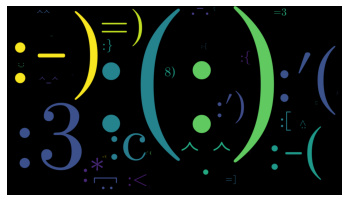

In [5]:
# Salva e genera la wordcloud relativa alle emoji
simple_wordcloud(emojis, 'emojis')

# Salva e genera la wordcloud relativa alle emoticon
simple_wordcloud(emoticons, 'emoticons')

## 2. Wordcloud dei sentimenti
- Generazione di wordcloud per i vari sentimenti

In [ ]:
# Salva le wordcloud di tutti i sentimenti
tweet_wordcloud('trust')

## 3. Istogramma
- Generazione istogramma rappresentante il tasso di corrispondenza delle parole delle risorse con quelle dei tweet

Tempo di esecuzione: -0.003976106643676758 secondi
Cartella - sadness: 0.045
Tempo di esecuzione: 7.401551723480225 secondi
Cartella - hope: 0.09
Tempo di esecuzione: 10.291112661361694 secondi
Cartella - neg: 0.009
Tempo di esecuzione: 295.15265464782715 secondi
Cartella - anticipation: 0.11
Tempo di esecuzione: 303.8403043746948 secondi
Cartella - pos: 0.18
Tempo di esecuzione: 474.89908266067505 secondi
Cartella - surprise: 0.029
Tempo di esecuzione: 506.5651295185089 secondi
Cartella - anger: 0.019
Tempo di esecuzione: 527.5297737121582 secondi
Cartella - trust: 0.022
Tempo di esecuzione: 598.2615115642548 secondi
Cartella - joy: 0.045
Tempo di esecuzione: 813.6713483333588 secondi
Cartella - like-love: 0.128
Tempo di esecuzione: 833.7556035518646 secondi
Cartella - fear: 0.016
Tempo di esecuzione: 919.692102432251 secondi
Cartella - disgust: 0.038


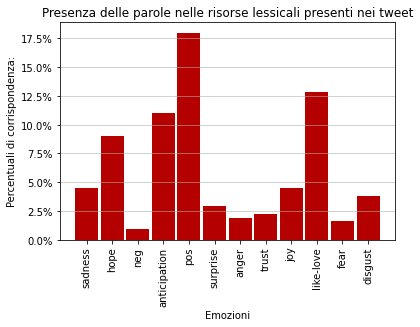

In [210]:
matching_tweets_resources()

# Output

In [11]:
print('\n Dictionary hashtags:')
print(hashtags)
print('\n')

print('\n Dictionary emoji:')
print(emojis)
print('\n')

print('\n Dictionary emoticons:')
print(emoticons)
print('\n')

print('\n Dictionary punteggiatura:')
print(punctuation_marks)
print('\n')

print('\n Dictionary slang:')
print(slang)
print('\n')

print('\n Dictionary risorse:')
print(resources['anger'])
print('\n')

print('\n Dictionary conteggio risorse usate nei tweet - youth:')
print(words_count['youth'])
print('\n')


print(stop_words)


 Dictionary hashtags:
{'#cantwait': 1491, '#wegotthis': 6, '': 195285, '#.': 10, '#love': 2003, '#nofilter': 87, '#vail': 2, '#mentionacutefollower': 1, '#happy': 437, '#lol': 297, '#future': 11, '#scna': 1, '#s': 60, '#newfollowers': 4, '#gnation': 8, '#mustfollow': 10, '#bbl': 2, '#': 1373, '#woofdotcom': 1, '#truth': 84, '#blessed': 149, '#rt4rt': 1, '#family': 341, '#broski': 5, '#loveya': 23, '#dying': 106, '#myluck': 20, '#theft': 4, '#orlando': 147, '#nonemergencyassistance': 1, '#ipad': 10, '#starbucks': 80, '#arturofuente': 1, '#kthanks': 6, '#justinbieber': 46, '#teammate': 3, '#picstitch': 120, '#college': 68, '#football': 84, '#ul': 1, '#tempe': 2, '#arizona': 11, '#xbox360': 5, '#thefl': 1, '#mybestfriendisthelegitshit': 1, '#patient': 2, '#perfect': 77, '#couldntgetbetter': 1, '#weekendfun': 3, '#soccerproblems': 2, '#happygal': 2, '#fact': 33, '#chocolate': 30, '#cookiesncream': 4, '#italianproblems': 2, '#imweak': 4, '#datenight': 47, '#pinotnoir': 2, '#saturdaynight':